<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr008779965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 5.2 MB/s 
     |████████████████████████████████| 41 kB 170 kB/s 
     |████████████████████████████████| 98 kB 7.0 MB/s 
     |████████████████████████████████| 4.5 MB 46.8 MB/s 
     |████████████████████████████████| 832 kB 44.3 MB/s 
     |████████████████████████████████| 54 kB 1.8 MB/s 
     |████████████████████████████████| 3.6 MB 45.4 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [3]:
source = lk.search_lightcurve("kplr008779965", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5153615016679,nan,nan,0,-1.596918e-03,1013.12242,821.91440,34237,2.5376820e+05,1.3832303e+01,2.6286270e+03,6.5931273e-01,nan,nan,0,nan,nan,nan,nan,1013.12242,5.4158994e-05,821.91440,5.7731108e-05,-4.6319980e-02,-9.8368451e-02
808.5357955067957,2.8504469e+05,1.5445614e+01,0,-1.596513e-03,1013.12226,821.91488,34238,2.5380964e+05,1.3833144e+01,2.6254065e+03,6.5830654e-01,2.8504469e+05,1.5445614e+01,0,nan,nan,nan,nan,1013.12226,5.4161472e-05,821.91488,5.7733632e-05,-4.6564329e-02,-9.7780555e-02
808.5562295122727,2.8505103e+05,1.5446835e+01,0,-1.596108e-03,1013.12251,821.91483,34239,2.5379281e+05,1.3832868e+01,2.6270784e+03,6.5904641e-01,2.8505103e+05,1.5446835e+01,0,nan,nan,nan,nan,1013.12251,5.4162192e-05,821.91483,5.7724268e-05,-4.6333302e-02,-9.7580463e-02
808.5766635179752,2.8505875e+05,1.5456326e+01,0,-1.595702e-03,1013.12277,821.91521,34240,2.5379452e+05,1.3832818e+01,2.6266106e+03,6.5840238e-01,2.8505875e+05,1.5456326e+01,0,nan,nan,nan,nan,1013.12277,5.4168282e-05,821.91521,5.7720663e-05,-4.6267916e-02,-9.7187370e-02
808.5970975240343,2.8505916e+05,1.5448329e+01,0,-1.595296e-03,1013.12236,821.91547,34241,2.5380595e+05,1.3832988e+01,2.6241560e+03,6.5779507e-01,2.8505916e+05,1.5448329e+01,0,nan,nan,nan,nan,1013.12236,5.4164462e-05,821.91547,5.7713445e-05,-4.6489332e-02,-9.6885860e-02
808.617531630327,2.8510844e+05,1.5454019e+01,0,-1.594890e-03,1013.12275,821.91567,34242,2.5386517e+05,1.3834322e+01,2.6228916e+03,6.5801495e-01,2.8510844e+05,1.5454019e+01,0,nan,nan,nan,nan,1013.12275,5.4158907e-05,821.91567,5.7705030e-05,-4.6313897e-02,-9.6583672e-02
808.6379656368445,2.8507953e+05,1.5460185e+01,0,-1.594483e-03,1013.12276,821.91568,34243,2.5385700e+05,1.3834280e+01,2.6276995e+03,6.5889972e-01,2.8507953e+05,1.5460185e+01,0,nan,nan,nan,nan,1013.12276,5.4164611e-05,821.91568,5.7704277e-05,-4.6358567e-02,-9.6308969e-02
808.6583995437177,2.8507262e+05,1.5458789e+01,10000000000000,-1.594076e-03,1013.12272,821.91579,34244,2.5386364e+05,1.3834329e+01,2.6233101e+03,6.5850317e-01,2.8507262e+05,1.5458789e+01,10000000000000,nan,nan,nan,nan,1013.12272,5.4166507e-05,821.91579,5.7696961e-05,-4.6342496e-02,-9.6113719e-02


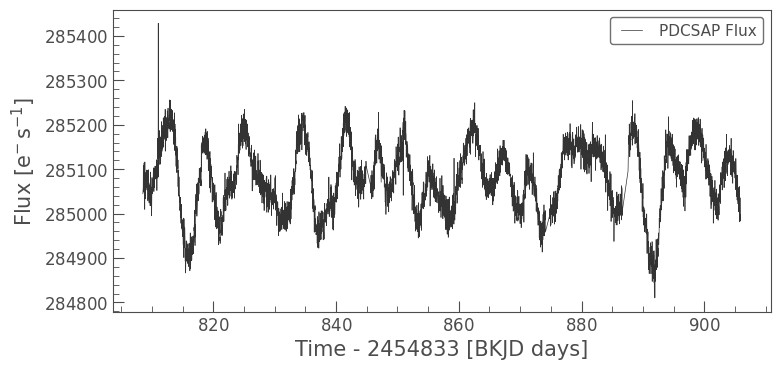

In [4]:
source.plot(label='PDCSAP Flux', normalize=False)

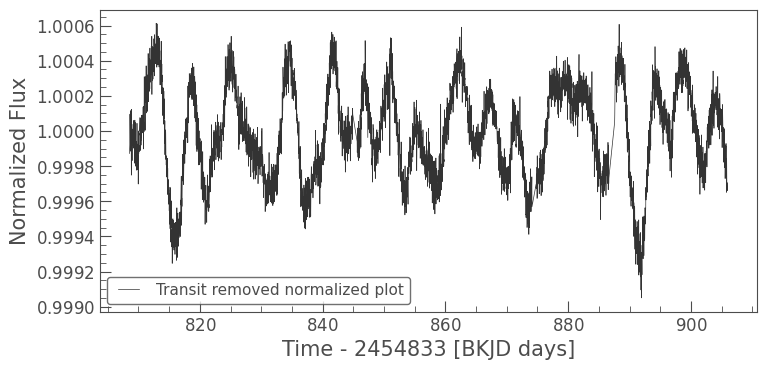

In [5]:
rem_out=source.remove_outliers(sigma_upper = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

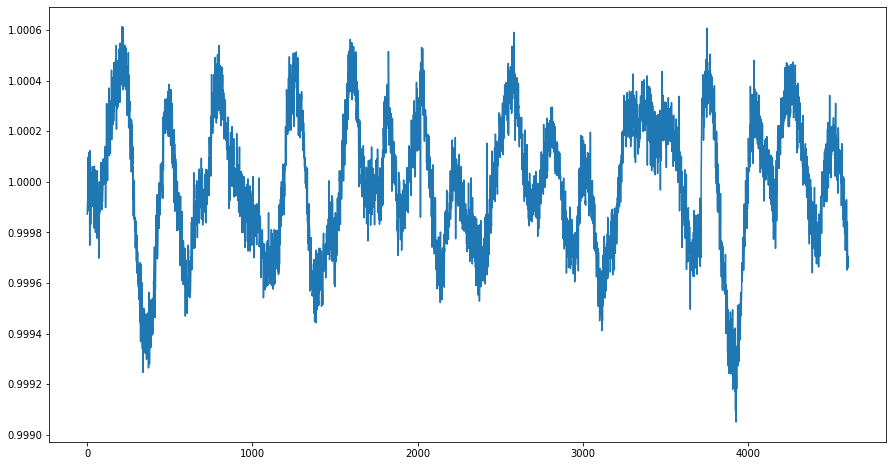

In [6]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [7]:
smoothed_signal = convolve(flux, Box1DKernel(16))

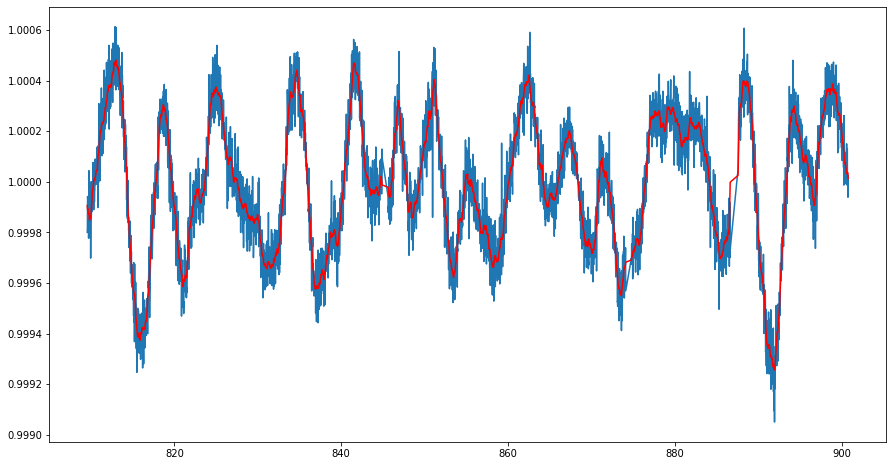

In [8]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

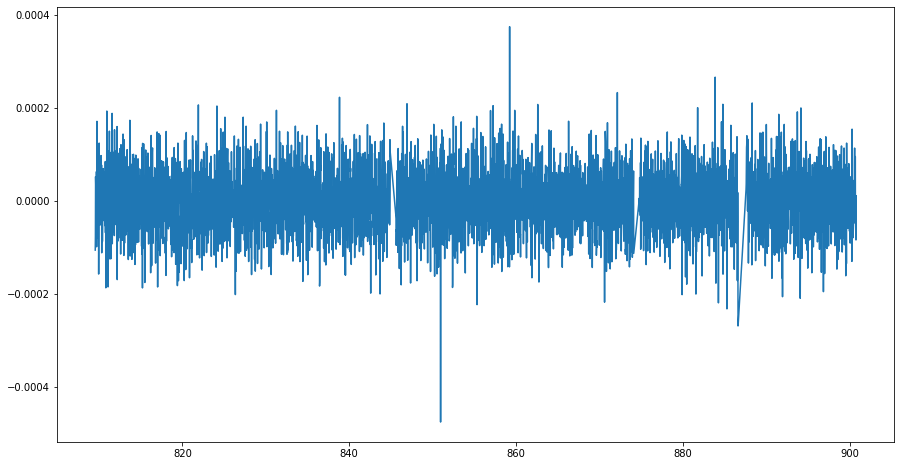

In [9]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [10]:
np.sqrt(np.mean(flkr**2))/1e-3

0.06855104584246874